In [80]:
import textstat as txst
# pip3 install textstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/train.csv', encoding = 'latin-1')

train_df['rd_automatedindex'] = train_df.excerpt.apply(txst.automated_readability_index)
train_df['rd_flesch_ease'] = train_df.excerpt.apply(txst.flesch_reading_ease)
train_df['rd_linearwrite'] = train_df.excerpt.apply(txst.linsear_write_formula)
train_df['rd_fleschkincaid_grade'] = train_df.excerpt.apply(txst.flesch_kincaid_grade)
train_df['rd_dalechall'] = train_df.excerpt.apply(txst.dale_chall_readability_score)
train_df['rd_consensus'] = train_df.excerpt.map(lambda t: txst.text_standard(t, float_output = True))



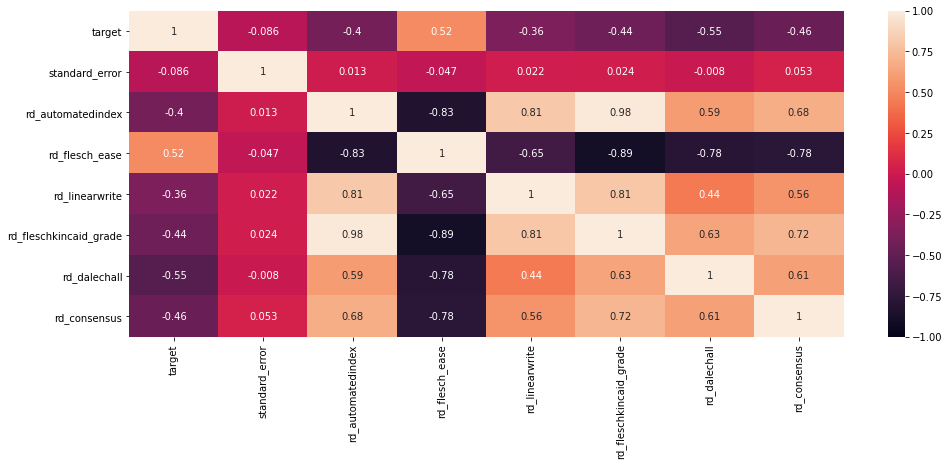

In [81]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)

# BEST OPTIONS:
# rd_dalechall -0.55
# rd_flesch_ease 0.52
